In [1]:
# Dependencies
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gmaps
import scipy.stats as st
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

In [2]:
# Store filepath in a variable
csv_import = "Resources/Seattle_abnb.csv"
initial_df = pd.read_csv(csv_import)

In [3]:
initial_df.describe()

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,...,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3818.000000,3191.000000
mean,5.550111e+06,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,...,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.946307,2.078919
std,2.962660e+06,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,...,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,5.893029,1.822348
min,3.335000e+03,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,...,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000,0.020000
25%,3.258256e+06,3.275204e+06,1.000000,1.000000,47.609418,-122.354321,2.000000,1.000000,1.000000,1.000000,...,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.695000
50%,6.118244e+06,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,...,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.540000
75%,8.035127e+06,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,...,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,3.000000
max,1.034016e+07,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,...,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,37.000000,12.150000


In [4]:
initial_df.head()

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,956883,...,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",5177328,...,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,16708587,...,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,NaN,9851441,...,NaN,NaN,NaN,NaN,f,flexible,f,f,1,NaN
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,1452570,...,10.0,10.0,9.0,9.0,f,strict,f,f,1,0.89


# Property Map - Seattle

In [5]:
#Heat Map - Property saturation by neighborhood (Caiti)
neighborhood_df=initial_df.groupby(["neighbourhood_group_cleansed","neighbourhood_cleansed"])
neighborhood_df.count()

id  name  summary  space  \
neighbourhood_group_cleansed neighbourhood_cleansed                             
Ballard                      Adams                   70    70       68     63   
                             Loyal Heights           52    52       50     49   
                             Sunset Hill             18    18       18     13   
                             West Woodland           64    64       63     55   
                             Whittier Heights        26    26       23     24   
...                                                  ..   ...      ...    ...   
West Seattle                 Fauntleroy              10    10        9      9   
                             Gatewood                22    22       22     19   
                             Genesee                 34    34       34     29   
                             North Admiral           49    49       47     42   
                             Seaview                 12    12       12     10   

                                                     description  \
neighbourhood_group_cleansed neighbourhood_cleansed                
Ballard                      Adams                            70   
                             Loyal Heights                    52   
                             Sunset Hill                      18   
                             West Woodland                    64   
                             Whittier Heights                 26   
...                                                          ...   
West Seattle                 Fauntleroy                       10   
                             Gatewood                         22   
                             Genesee                          34   
                             North Admiral                    49   
                             Seaview                          12   

                                                     experiences_offered  \
neighbourhood_group_cleansed neighbourhood_cleansed                        
Ballard                      Adams                                    70   
                             Loyal Heights                            52   
                             Sunset Hill                              18   
                             West Woodland                            64   
                             Whittier Heights                         26   
...                                                                  ...   
West Seattle                 Fauntleroy                               10   
                             Gatewood                                 22   
                             Genesee                                  34   
                             North Admiral                            49   
                             Seaview                                  12   

                                                     neighborhood_overview  \
neighbourhood_group_cleansed neighbourhood_cleansed                          
Ballard                      Adams                                      57   
                             Loyal Heights                              44   
                             Sunset Hill                                 9   
                             West Woodland                              47   
                             Whittier Heights                           22   
...                                                                    ...   
West Seattle                 Fauntleroy                                  9   
                             Gatewood                                   17   
                             Genesee                                    28   
                             North Admiral                              34   
                             Seaview                                     7   

                                                     notes  transit  host_id  \
neighbourhood_group_cleansed n

In [6]:
# Store latitude and longitude in locations
#locations = airport_df[["Lat", "Lng"]]

# Property Types

In [7]:
# Pie Chart - top 10 property types (Yuly)
propertytype_df=initial_df.groupby("property_type")
propertytype_df=propertytype_df.count().sort_values("id",ascending=False).reset_index()


In [8]:
propertytype_df

,property_type,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,House,1733,1733,1619,1527,1733,1733,1285,1025,1341,...,1454,1458,1456,1455,1733,1733,1733,1733,1733,1466
1,Apartment,1708,1708,1650,1404,1708,1708,1218,957,1252,...,1424,1426,1425,1425,1708,1708,1708,1708,1708,1439
2,Townhouse,118,118,118,98,118,118,92,70,97,...,80,80,80,80,118,118,118,118,118,82
3,Condominium,91,91,91,69,91,91,60,49,62,...,68,69,68,68,91,91,91,91,91,69
4,Loft,40,40,40,35,40,40,35,28,36,...,33,33,33,33,40,40,40,40,40,34
5,Bed & Breakfast,37,37,35,35,37,37,30,26,31,...,26,26,26,26,37,37,37,37,37,26
6,Other,22,22,22,20,22,22,18,16,17,...,19,19,19,19,22,22,22,22,22,19
7,Cabin,21,21,21,20,21,21,16,16,16,...,21,21,21,21,21,21,21,21,21,21
8,Bungalow,13,13,13,13,13,13,11,6,12,...,9,9,9,9,13,13,13,13,13,9
9,Camper/RV,13,13,11,10,13,13,6,6,6,...,10,10,10,10,13,13,13,13,13,10


In [9]:
#top_property['property_type']
labels

NameError: name 'labels' is not defined

<IPython.core.display.Javascript object>


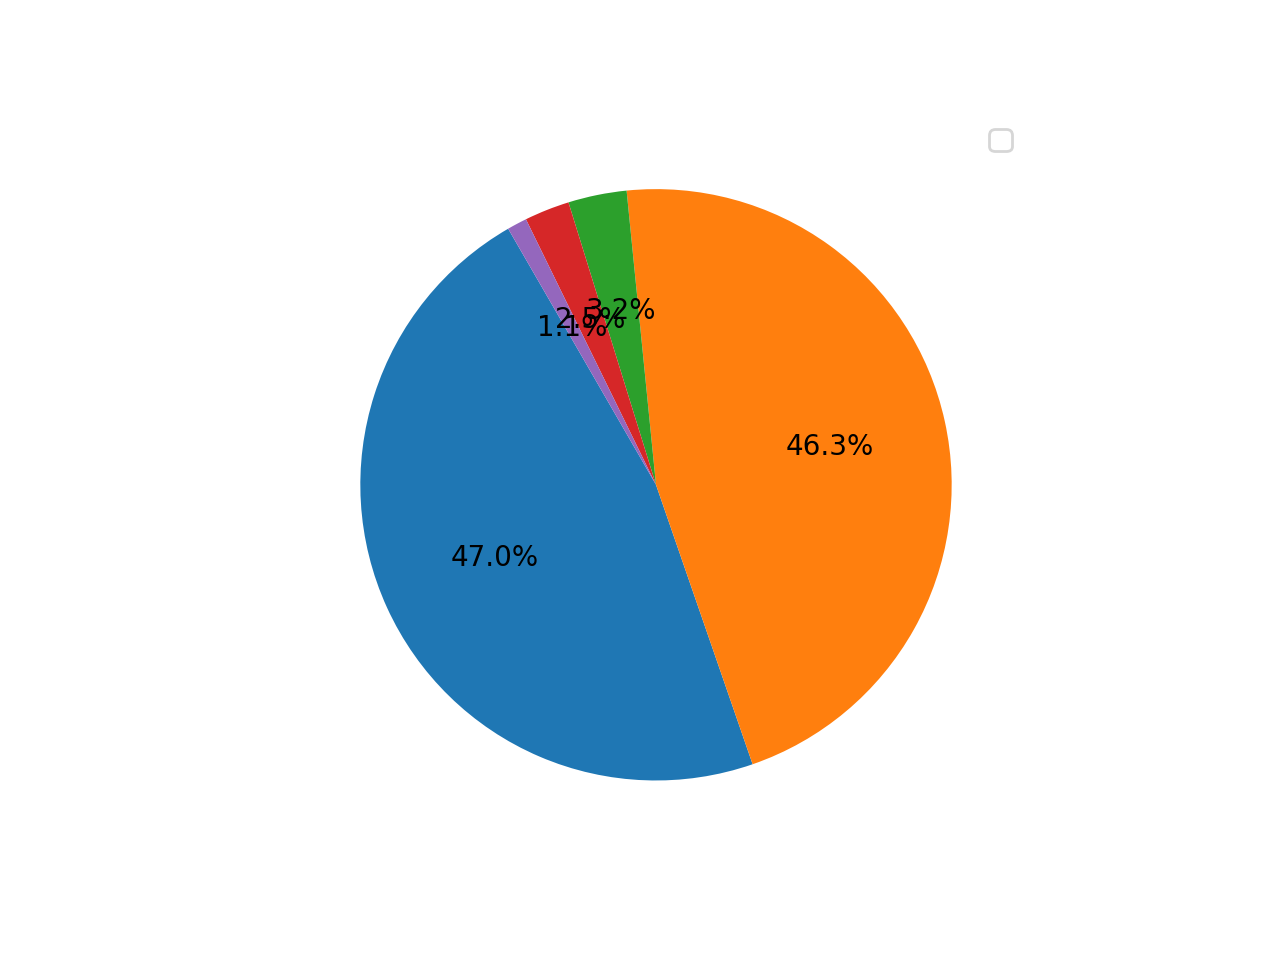

In [10]:
top_property = propertytype_df[['property_type', 'id']].head(5)
#top_property.plot(kind="pie")
labels = top_property['property_type'].values
sizes = top_property['id'].values
plt.legend(labels, loc="best")
plt.pie(sizes, autopct="%1.1f%%", startangle=120)
plt.show()

# mice_count = mice_merge_df["Sex"].value_counts()
# plt.figure()
# mice_count.plot(kind="pie", autopct='%1.1f%%')
# plt.axis("equal")
# plt.title("Distribution of Female vs Male Mice")
# plt.tight_layout()
# plt.show()

# Room Types

In [11]:
#Bar chart (caiti) - Quick'n'easy :)... explode private room & shared room to demonstrate that it is still less than 1/2 of the total listings
roomtype_df=initial_df.groupby("room_type").count().sort_values("id",ascending=False).reset_index()

In [12]:
roomtype_df.head()


,room_type,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,Entire home/apt,2541,2541,2436,2187,2541,2541,1882,1444,1923,...,2121,2124,2122,2121,2541,2541,2541,2541,2541,2141
1,Private room,1160,1160,1099,966,1160,1160,834,704,885,...,948,951,950,950,1160,1160,1160,1160,1160,957
2,Shared room,117,117,106,96,117,117,70,64,76,...,91,92,91,91,117,117,117,117,117,93


<IPython.core.display.Javascript object>


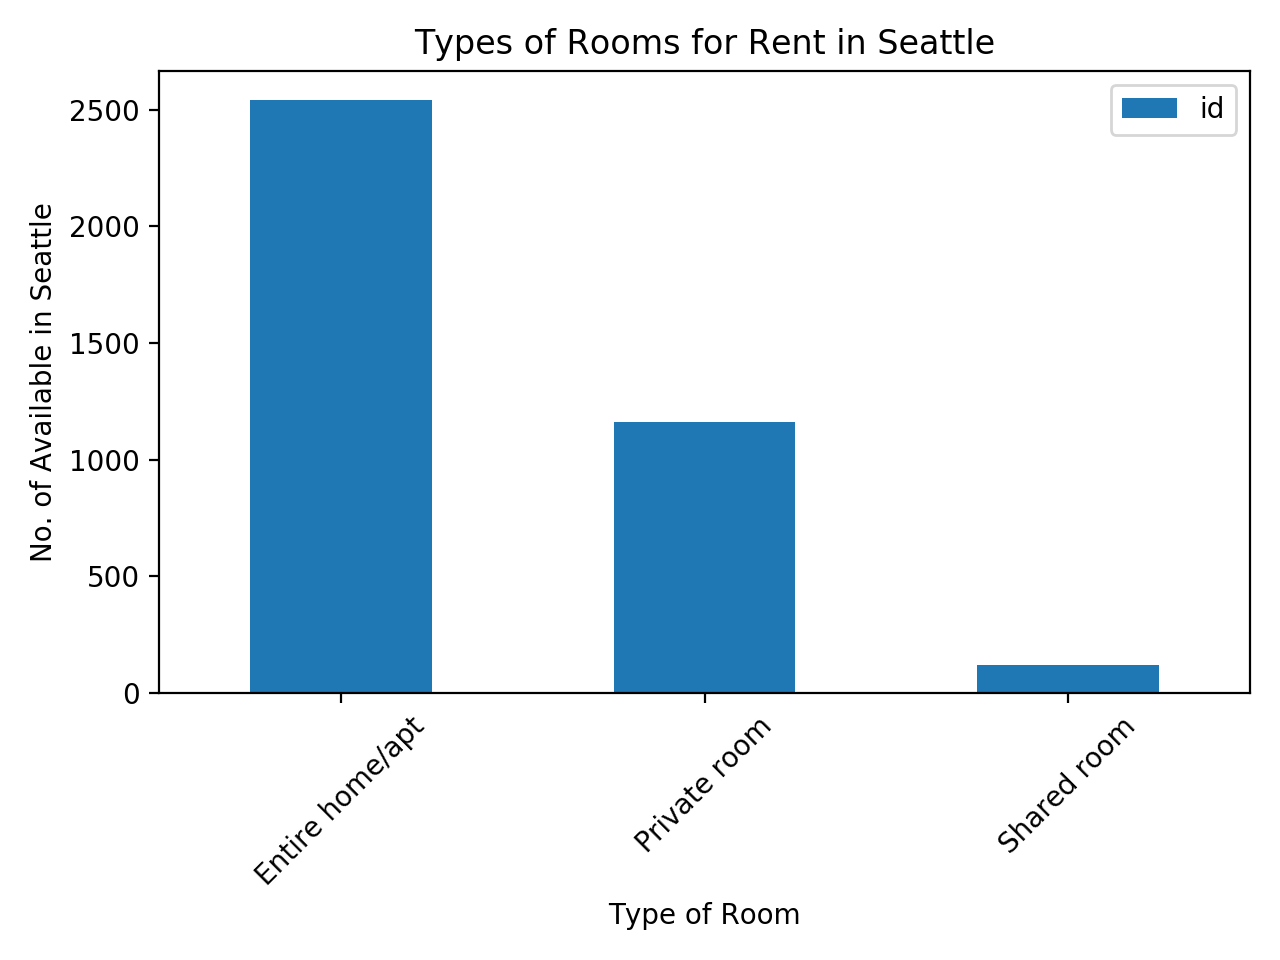

In [13]:
#Create the bar chart
roomtype = roomtype_df[['room_type', 'id']]
roomtype.plot(kind="bar", x='room_type', y='id')
plt.xticks(rotation=45)
plt.title("Types of Rooms for Rent in Seattle")
plt.xlabel("Type of Room")
plt.ylabel("No. of Available in Seattle")
plt.show()
plt.tight_layout()

# Ratings

In [14]:
ratings_df=initial_df.groupby("review_scores_rating")
ratings_df.count().sort_values("id",ascending=False).head(10)

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
review_scores_rating,,,,,,,,,,,,,,,,,,,,,
100.0,781,781,769,648,781,781,582,440,592,781,...,773,778,775,774,781,781,781,781,781,781
98.0,292,292,278,273,292,292,236,185,247,292,...,292,292,292,292,292,292,292,292,292,292
96.0,278,278,254,263,278,278,217,175,228,278,...,278,278,278,278,278,278,278,278,278,278
97.0,266,266,249,253,266,266,226,190,231,266,...,266,266,266,266,266,266,266,266,266,266
95.0,260,260,239,244,260,260,200,179,208,260,...,260,260,260,260,260,260,260,260,260,260
94.0,198,198,182,184,198,198,154,134,164,198,...,198,198,198,198,198,198,198,198,198,198
93.0,184,184,174,158,184,184,139,121,143,184,...,184,184,184,184,184,184,184,184,184,184
99.0,146,146,139,138,146,146,121,99,127,146,...,146,146,146,146,146,146,146,146,146,146
90.0,138,138,130,124,138,138,102,90,105,138,...,138,138,138,138,138,138,138,138,138,138


In [15]:
initial_df["review_scores_rating"].min()

20.0

In [16]:
#Binning
Rating_Bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Bin_Names=["<10", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-100"]

#Sort Values into Bins
initial_df["Ratings Group"]=pd.cut(initial_df["review_scores_rating"],Rating_Bins, labels=Bin_Names)

In [17]:
#Correlation to property features OR price vs rating below
Ratings_df=initial_df.groupby("Ratings Group")
Ratings_df.count()

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
Ratings Group,,,,,,,,,,,,,,,,,,,,,
<10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10-19,1,1,1,1,1,1,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
20-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30-39,4,4,4,2,4,4,1,0,1,4,...,4,4,4,4,4,4,4,4,4,4
40-49,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50-59,15,15,15,11,15,15,11,10,10,15,...,15,15,15,15,15,15,15,15,15,15
60-69,16,16,14,16,16,16,12,10,12,16,...,16,16,16,16,16,16,16,16,16,16
70-79,145,145,139,120,145,145,100,69,103,145,...,142,144,143,143,145,145,145,145,145,145
80-89,383,383,359,345,383,383,277,242,300,383,...,383,383,383,383,383,383,383,383,383,383


In [22]:
data = initial_df.groupby("Ratings Group") 
plt.scatter(data["Ratings Group"], data["id"])
plt.title("Ratings Group vs id")
plt.xlabel("Ratings Group")
plt.ylabel("id")
plt.show()                               

ConversionError: Failed to convert value(s) to axis units: <pandas.core.groupby.generic.SeriesGroupBy object at 0x7f89628ac310>

# Pricing

In [ ]:
initial_df["price"].dtype

In [ ]:
initial_df['price'] = initial_df['price'].str.replace('$', '')
initial_df['price'] = initial_df['price'].str.replace(',', '')
initial_df['price'] = initial_df['price'].str.strip()

In [ ]:
#Price vs Rating regression
#Box & Whisker to identify general outliers
initial_df['price'] = pd.to_numeric(initial_df['price'])
initial_df["price"].describe().round(2)

# Hosts

In [ ]:
initial_df["host_id"].nunique()

In [ ]:
#Market saturation by hosts... Bar chart- top 10 host IDs
#Marker map of top 10 hosts vs total property map
host_df=initial_df.groupby("host_id")
host_df=host_df.count().sort_values("id",ascending=False).reset_index()

In [ ]:
host_df

In [ ]:
#Binning
Rating_Bins=[0, 1, 4, 9, 99999]
Bin_Names=["Single Home", "Multiple Homes: 2-4", "Amateur Hospitality: 5-9", "Pro Hospitality: 10+"]

#Sort Values into Bins
host_df["Host Type"]=pd.cut(host_df["id"],Rating_Bins, labels=Bin_Names)


In [ ]:
host_df.groupby("Host Type").count()

In [ ]:
# host = roomtype_df[['room_type', 'id']]
# roomtype.plot(kind="bar", x='room_type', y='id')
# plt.xticks(rotation=45)
# plt.title("Types of Rooms for Rent in Seattle")
# plt.xlabel("Type of Room")
# plt.ylabel("No. of Available in Seattle")
# plt.show()
# plt.tight_layout()